Section 13.2

Consider an electromagnetic (EM) pulse generated in the time domain.  This generates an ideal hyperbolic secant shape in the time domain.  It is this time domain signal that we will attempt to reconstruct via denoising and filtering.

Text(0.5, 1.0, 'Ideal time domain pulse')

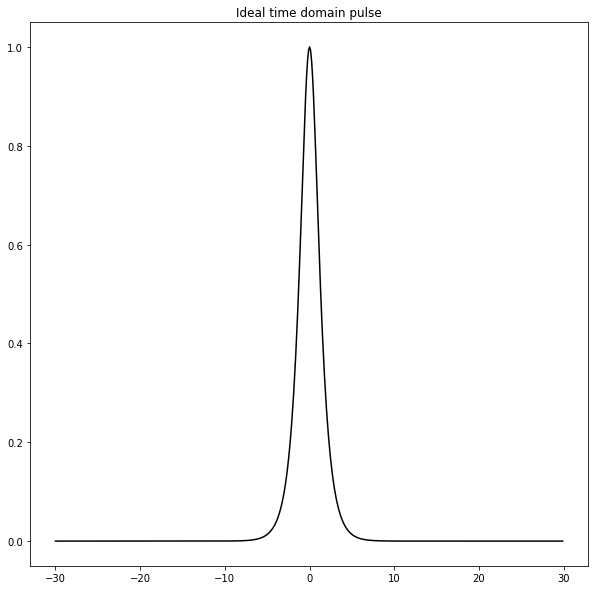

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

L=30                      # time slot to transform
n=np.power(2,9)           # number of Fourier modes

t = np.linspace(-L, L, n+1)
t = t[:-1]                # set up time discretization
k = 2*np.pi/(2*L)*np.concatenate((np.arange(0,n/2), np.arange(-n/2,0)))   # freq components of FFT

u = 1/np.cosh(t)          # function sech(t) (numpy does not have separate sech function)

fig1, axi = plt.subplots()
axi.plot(t, u, 'k')
axi.set_title('Ideal time domain pulse')

In most applications, the signals are not ideal.  Rather, they have a large amount of noise integrated within them -- usually white noise, which affects all frequencies the same. Here, add complex white noise to the idealized signal in the frequency domain, then transform it back to the time frequency to see the effect on the signal.  At this noise level, though, the original time domain pulse is still easily detectable.

Text(0.5, 1.0, 'Slightly noisy signal')

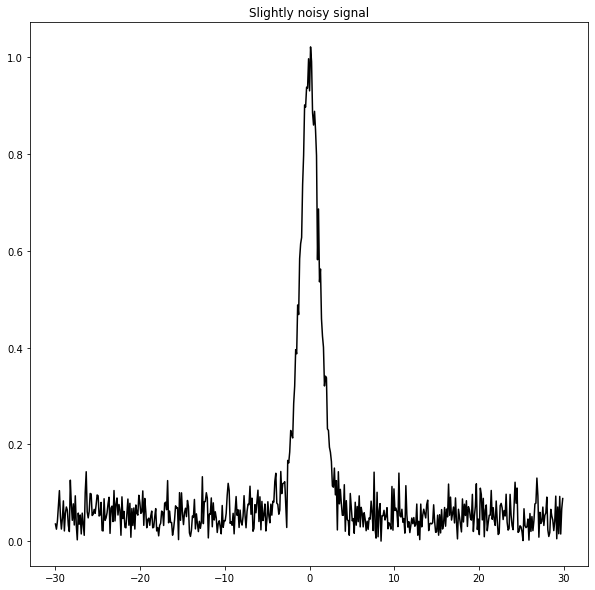

In [2]:
from numpy.fft import fft, ifft, fftshift
from numpy.random import randn

noise = 1
ut = fft(u)
utn = ut + noise*(randn(n) + (1j)*randn(n))
un = ifft(utn)

fig2, axn = plt.subplots()
axn.plot(t, abs(un), 'k')
axn.set_title('Slightly noisy signal')

Here, one can see the impact of a large noise applied to the underlying signal.  The signal is completely buried within the white noise fluctuations, making the detection of a signal difficult, if not impossible, wih the unfiltered noisy signal field.

Text(0, 0.5, '|u|/max(|ut|)')

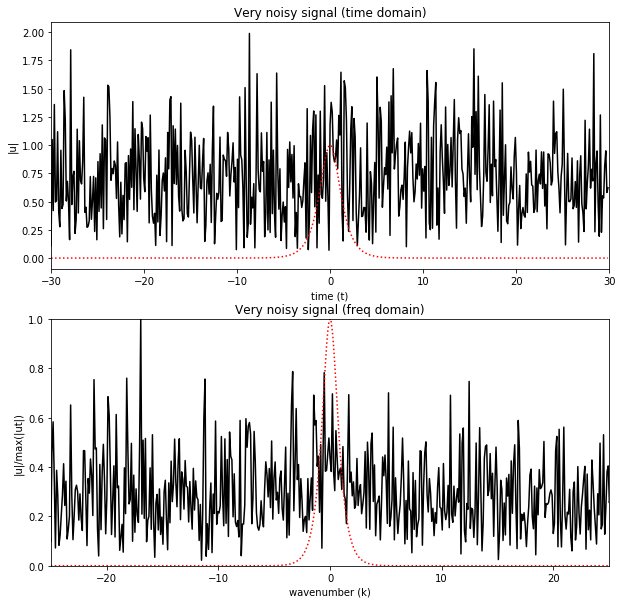

In [13]:
noise=13
unt = ut + noise*(randn(n) + (1j)*randn(n))
un = ifft(unt)

fig3, (axvnt, axvnf) = plt.subplots(2, 1)
axvnt.plot(t, abs(un), 'k', t, u, 'r:')
axvnt.set_title('Very noisy signal (time domain)')
axvnt.set_xlim(-30, 30)
#axvnt.set_ylim(0, 2)
axvnt.set_xlabel('time (t)')
axvnt.set_ylabel('|u|')

axvnf.plot(fftshift(k), abs(fftshift(unt))/max(abs(unt)), 'k',fftshift(k), abs(fftshift(ut))/max(abs(fftshift(ut))), 'r:')
axvnf.set_title('Very noisy signal (freq domain)')
axvnf.set_xlim(-25, 25)
axvnf.set_ylim(0, 1)
axvnf.set_xlabel('wavenumber (k)')
axvnf.set_ylabel('|u|/max(|ut|)')

Application of a filter strongly attenuates frequencies away from the center frequency k<sub>0</sub>.  Here, a simple Gaussian filter is applied to isolate the signal input around target frequency k<sub>0</sub>=0 with a bandwidth parameter of 0.2.  This nicely extracts the signal field despite the strength of the white noise, if we consider the horizontal dotted line to be the detection threshold.  

Text(0, 0.5, '|u|/max(|ut|)')

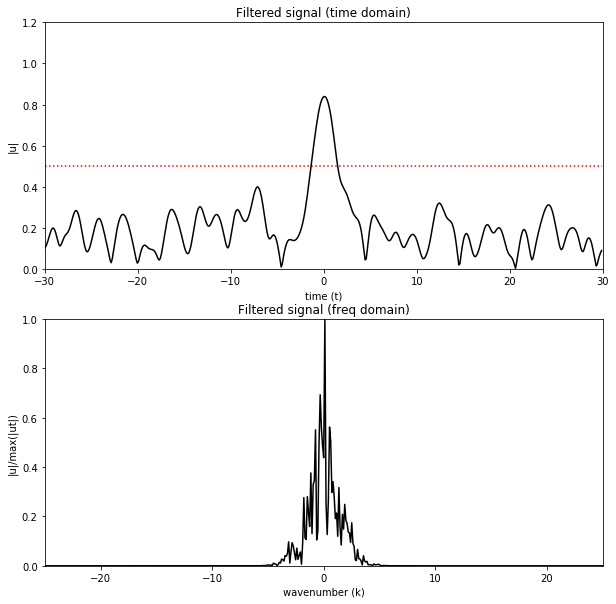

In [7]:
k0 = 0
bw = 0.2
filter = np.exp(-bw*np.power(k-k0,2))
unft = filter*unt               # multiply the filter by the signal in the frequency domain
unf = ifft(unft)                # invert the transform to get back to the time domain

det_thresh = 0.5

fig4, (axft, axff) = plt.subplots(2, 1)
axft.plot(t, det_thresh*np.ones(n), 'r:', t, abs(unf), 'k')
axft.set_title('Filtered signal (time domain)')
axft.set_xlim(-30, 30)
axft.set_ylim(0, 1.2)
axft.set_xlabel('time (t)')
axft.set_ylabel('|u|')

axff.plot(fftshift(k), abs(fftshift(unft))/max(abs(fftshift(unft))), 'k')
axff.set_title('Filtered signal (freq domain)')
axff.set_xlim(-25, 25)
axff.set_ylim(0, 1)
axff.set_xlabel('wavenumber (k)')
axff.set_ylabel('|u|/max(|ut|)')



With the Gausssian filter, smaller bandwidth parameters give a stronger signal in the time domain, but don't do so well in filtering to a single target frequency.  A larger bandwidth parameter gives a weaker time domain signal but hones in on a target frequency with more precision.  These two needs must be balanced.

Text(0, 0.5, '|u|/max(|ut|)')

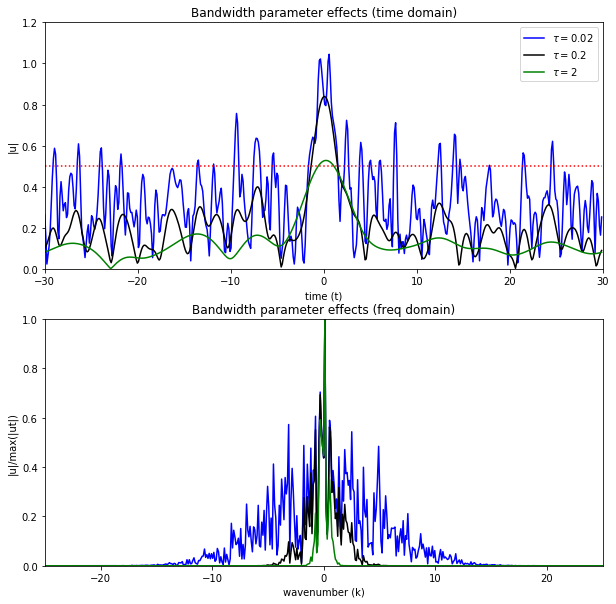

In [11]:
bw=0.02
unft1 = np.exp(-bw*np.power(k-k0,2))*unt
unf1 = ifft(unft1)

# bandwidth filter 0.2
bw=2
unft5 = np.exp(-bw*np.power(k-k0,2))*unt 
unf5 = ifft(unft5)

fig5, (axftb, axffb) = plt.subplots(2, 1)
b1, b2, b5, dt = axftb.plot(t, abs(unf1), 'b', t, abs(unf), 'k', t, abs(unf5), 'g', t, det_thresh*np.ones(n), 'r:')
axftb.set_title('Bandwidth parameter effects (time domain)')
axftb.set_xlim(-30, 30)
axftb.set_ylim(0, 1.2)
axftb.set_xlabel('time (t)')
axftb.set_ylabel('|u|')
axftb.legend((b1, b2, b5), ['$\\tau=0.02$','$\\tau=0.2$', '$\\tau=2$'])

axffb.plot(fftshift(k), abs(fftshift(unft1))/max(abs(fftshift(unft1))), 'b', fftshift(k), abs(fftshift(unft))/max(abs(fftshift(unft))), 'k', fftshift(k), abs(fftshift(unft5))/max(abs(fftshift(unft5))), 'g')
axffb.set_title('Bandwidth parameter effects (freq domain)')
axffb.set_xlim(-25, 25)
axffb.set_ylim(0, 1)
axffb.set_xlabel('wavenumber (k)')
axffb.set_ylabel('|u|/max(|ut|)')

As a matter of completeness, the extraction of the EM frequency is also illustrated when not centered on the center (target) frequency.  Below we show the field extracted if the filter is centered around k<sub>0</sub>=15.  The resulting signal in the frequency domain emphasizes the amount of white noise near that frequency.  However, after inverting the filtered Fourier transform, it is clear that there is no discernible target present.  As before, a detection theshold is set (red dotted line) and the white noise fluctuations clearly produce a field well below it.

Text(0, 0.5, '|u|/max(|ut|)')

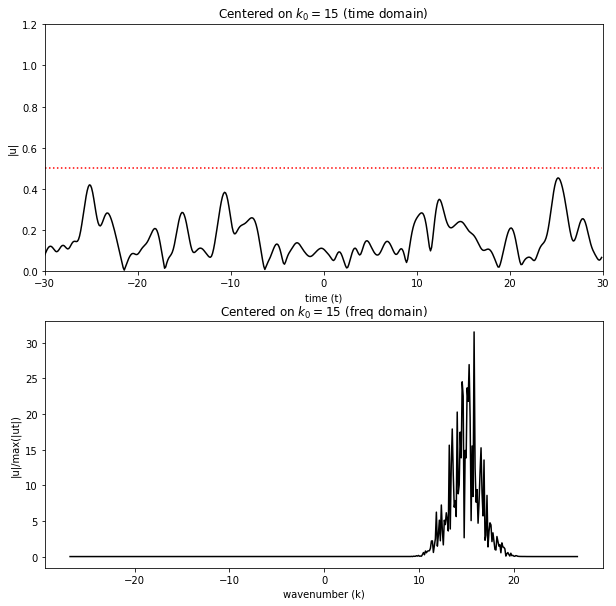

In [6]:
k0 = 15; bw=0.2
unft15 = np.exp(-bw*np.power(k-k0,2))*unt
unf15 = ifft(unft15)

fig6, (axftc, axffc) = plt.subplots(2, 1)
axftc.plot(t, abs(unf15), 'k', t, det_thresh*np.ones(n), 'r:')
axftc.set_title('Centered on $k_0 = 15$ (time domain)')
axftc.set_xlim(-30, 30)
axftc.set_ylim(0, 1.2)
axftc.set_xlabel('time (t)')
axftc.set_ylabel('|u|')

axffc.plot(fftshift(k), abs(fftshift(unft15)), 'k')
axffc.set_title('Centered on $k_0 = 15$ (freq domain)')
#axffc.set_xlim(-25, 25)
#axffc.set_ylim(0, 1)
axffc.set_xlabel('wavenumber (k)')
axffc.set_ylabel('|u|/max(|ut|)')